In [1]:
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error


In [2]:
D_X, D_y = np.loadtxt("train.dat", usecols=(0,1), unpack=True)
D_Xt, D_yt = np.loadtxt("test.dat", usecols=(0,1), unpack=True)
X = D_X.reshape(-1,1)
y = D_y
Xt = D_Xt.reshape(-1,1)
yt = D_yt
lambda_val_ = [0,math.exp(-25),math.exp(-20),
             math.exp(-14),math.exp(-7),
             math.exp(-3),1,math.exp(7),
             math.exp(3)]

In [3]:
data = []
for d in range(0,13):
    for alpha in lambda_val_:
    
        x_scale = (X - np.mean(X))/np.std(X)
        poly = PolynomialFeatures(degree=d)
        X_trans = poly.fit_transform(x_scale)
        n_folds = 6
        rmse_scores = np.zeros(n_folds)
        scores =[]
        cv_method = KFold(n_splits=n_folds, shuffle=False, random_state=None)
        for i, (train_idx, test_idx) in enumerate(cv_method.split(X_trans, y)):

            X_train, y_train = X_trans[train_idx], y[train_idx]
            #print(train_idx, test_idx)
            X_test, y_test = X_trans[test_idx], y[test_idx]
            x_test = X[test_idx]

            identity_matrix = np.identity(d+1)
            w = (np.linalg.inv(X_train.T @ X_train + alpha * identity_matrix) @ X_train.T @ y_train)
            y_pred = X_test @ w
            
            
            #rmse_scores[i] = np.sqrt(mean_squared_error(y_test, y_pred))
            score = math.sqrt((np.square(y_test-y_pred).mean()))
            scores.append(score)
            #print(d,alpha)

            #print("Fold {}: RMSE = {:.5f}".format(i+1, rmse_scores[i]))
            if (d == 0) & (alpha ==0)&(i == 0):
                print(score,y_pred,y_test,rmse_scores[i],test_idx)
            else:
                continue
            

        #print("Mean RMSE = {:.5f}".format(np.array(scores).mean()))
        data.append([d,alpha,np.array(scores).mean()])
        

1.222377643247526 [65.57747908 65.57747908 65.57747908 65.57747908 65.57747908 65.57747908
 65.57747908] [65.88791334 67.21901249 64.3206674  66.92166376 66.11401206 66.59359495
 67.29843266] 0.0 [0 1 2 3 4 5 6]


In [4]:
data

[[0, 0, 1.0155605589711298],
 [0, 1.3887943864964021e-11, 1.015560558975155],
 [0, 2.061153622438558e-09, 1.0155605595683739],
 [0, 8.315287191035679e-07, 1.0155607999176473],
 [0, 0.0009118819655545162, 1.0158266933791167],
 [0, 0.049787068367863944, 1.0353512799120603],
 [0, 1, 2.1676601450577384],
 [0, 1096.6331584284585, 63.68114012450022],
 [0, 20.085536923187668, 23.98229453721574],
 [1, 0, 1.0835561617376976],
 [1, 1.3887943864964021e-11, 1.0835561617405587],
 [1, 2.061153622438558e-09, 1.0835561621614958],
 [1, 8.315287191035679e-07, 1.0835563327105942],
 [1, 0.0009118819655545162, 1.083744903990815],
 [1, 0.049787068367863944, 1.097451300752388],
 [1, 1, 2.1778952337804607],
 [1, 1096.6331584284585, 63.71333448879172],
 [1, 20.085536923187668, 24.286951371112313],
 [2, 0, 0.775429312351411],
 [2, 1.3887943864964021e-11, 0.7754293123534884],
 [2, 2.061153622438558e-09, 0.7754293126602781],
 [2, 8.315287191035679e-07, 0.775429436958122],
 [2, 0.0009118819655545162, 0.77557016486

1e-06

In [36]:
import pandas as pd
pd.DataFrame(data).to_excel("final2.xlsx")

In [23]:
x_scale = (X - np.mean(X))/np.std(X)
poly = PolynomialFeatures(degree=12)
X_trans = poly.fit_transform(x_scale)
x_scalet = (Xt - np.mean(Xt))/np.std(Xt)
X_trans_t = poly.fit_transform(x_scalet)
identity_matrix = np.identity(12+1)
w = (np.linalg.inv(X_trans.T @ X_trans + math.exp(-7) * identity_matrix) @ X_trans.T @ y)
y_pred = X_trans_t @ w
y_predt = X_trans @ w

In [24]:
y_predt

array([65.79988712, 67.2701204 , 64.38902412, 66.97081236, 66.11496769,
       66.59688719, 67.26820908, 65.87611922, 65.55309003, 66.41967217,
       65.59526925, 65.65693453, 66.29680969, 65.23710653, 64.83941174,
       63.33958483, 66.38681095, 65.97739486, 63.88642396, 66.79525671,
       67.1134634 , 65.48531493, 66.08898034, 65.45964392, 65.65319365,
       65.36569835, 65.93635649, 66.23310061, 66.78529863, 65.16142114,
       66.1765427 , 62.26577218, 67.21471821, 61.95289516, 64.94575168,
       66.33365438, 66.35573138, 66.48997321, 65.5828425 , 65.54464542,
       66.08702726, 65.00554427])

In [16]:
y_predt

array([65.79988712, 67.2701204 , 64.38902412, 66.97081236, 66.11496769,
       66.59688719, 67.26820908, 65.87611922, 65.55309003, 66.41967217,
       65.59526925, 65.65693453, 66.29680969, 65.23710653, 64.83941174,
       63.33958483, 66.38681095, 65.97739486, 63.88642396, 66.79525671,
       67.1134634 , 65.48531493, 66.08898034, 65.45964392, 65.65319365,
       65.36569835, 65.93635649, 66.23310061, 66.78529863, 65.16142114,
       66.1765427 , 62.26577218, 67.21471821, 61.95289516, 64.94575168,
       66.33365438, 66.35573138, 66.48997321, 65.5828425 , 65.54464542,
       66.08702726, 65.00554427])

In [13]:
X_trans.shape

(42, 12)

In [15]:
math.sqrt((np.square(yt-y_pred).mean()))

0.39441813448401497

In [16]:
math.sqrt((np.square(y-y_predt).mean()))

0.06622557625749963

In [17]:
w

array([ 6.54694985e+01,  4.99966868e-01,  5.30334588e+00, -2.17867243e-01,
       -6.61543963e+00,  5.58441428e-01,  3.22185213e+00, -4.93838592e-01,
       -8.79523527e-01,  2.24289820e-01,  1.06576681e-01, -3.64755283e-02])

In [53]:
XX = np.append(X,Xt)

In [54]:
YY = np.append(y,yt)

In [55]:
YYt_11 = np.append(y,y_pred)
YYt_12 = np.append(y,y_predd)

In [56]:
import pandas as pd
df = pd.DataFrame([XX,YY,YYt_11,YYt_12])

In [11]:
df = df.T
df.columns = ["year","true values","predicted values d = 11","predicted values d =12"]


NameError: name 'df' is not defined

C:\Users\SS Studios\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SS Studios\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Polynomal curve d = 12 fitted with training data ')]

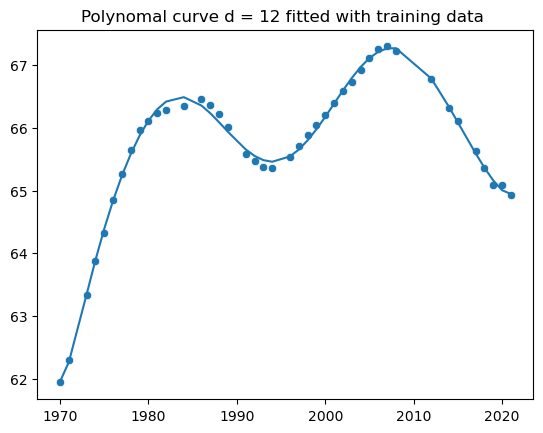

In [25]:
import seaborn as sns
sns.lineplot(X.flatten(),y_predt)
sns.scatterplot(X.flatten(),y).set(title = "Polynomal curve d = 12 fitted with training data ")

[Text(0.5, 1.0, 'd = 12 and lambda = exp(-7)')]

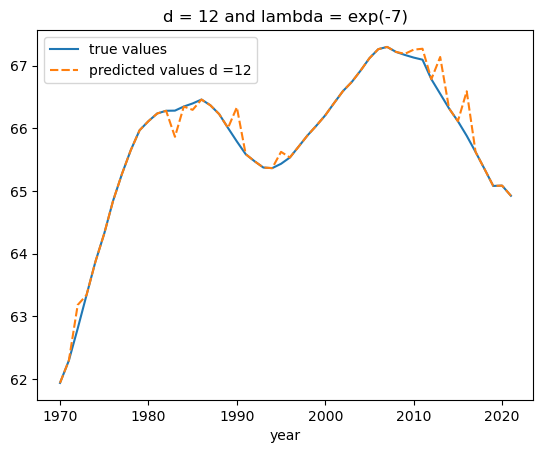

In [59]:
sns.lineplot(data=df.set_index('year')[["true values","predicted values d =12"]]).set(title="d = 12 and lambda = exp(-7)")

[Text(0.5, 1.0, 'd = 12 and lambda = exp(-7)')]

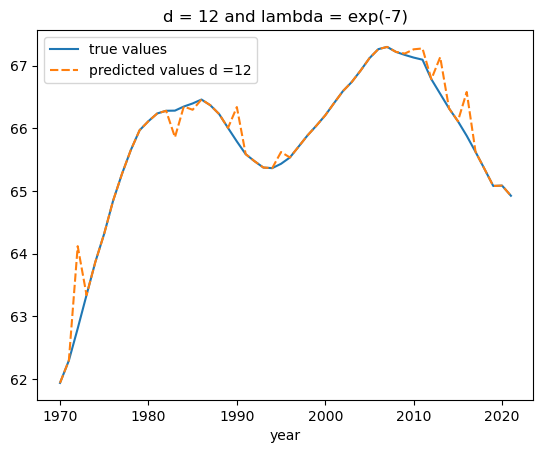

In [146]:
sns.lineplot(data=df.set_index('year')[["true values","predicted values d =12"]]).set(title="d = 12 and lambda = exp(-7)")

In [22]:
df[["year","true values"]].corr()

,year,true values
year,1.000000,0.525747
true values,0.525747,1.000000


C:\Users\SS Studios\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

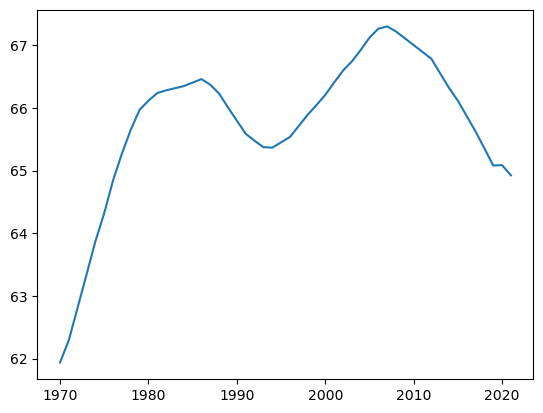

In [63]:
sns.lineplot(X.flatten(),y.flatten())

In [70]:
df[0:42].describe()
df1 = df[0:42]

In [71]:
df1["year1"] = (df1.year - df1.year.mean())/df1.year.std()

C:\Users\SS Studios\AppData\Local\Temp\ipykernel_1364\1021667962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["year1"] = (df1.year - df1.year.mean())/df1.year.std()


In [75]:
df1[["year1","true values"]].describe()

,year1,true values
count,4.200000e+01,42.000000
mean,-2.833712e-15,65.703978
std,1.000000e+00,1.181847
min,-1.631187e+00,61.938858
25%,-8.915171e-01,65.357308
50%,1.252351e-02,65.987610
75%,7.193189e-01,66.363263
max,1.721982e+00,67.298433
